In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import sys
from os import system
from IPython.display import clear_output
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import phik 
import seaborn as sns
from phik import resources, report
from phik.report import plot_correlation_matrix
from itertools import combinations
import random
from tabulate import tabulate
from IPython.display import display, HTML
import graphviz
import networkx as nx
import itertools

In [2]:
import sys

class add_path():
    def __init__(self, path):
        self.path = path

    def __enter__(self):
        sys.path.insert(0, self.path)

    def __exit__(self, exc_type, exc_value, traceback):
        try:
            sys.path.remove(self.path)
        except ValueError:
            pass
with add_path('/home/hshadman/.local/lib/python3.7/site-packages'):
    matplotlib = __import__('matplotlib')
with add_path('/home/hshadman/.local/lib/python3.7/site-packages'):
    sklearn = __import__('sklearn')    

In [107]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score,f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPClassifier

# CNV scratch work
# ONLY TCGA BRCA

In [4]:
pan_tcga_sample_info = pd.read_csv("../gtex_and_tcga/TcgaTargetGTEX_phenotype.txt.gz",sep='\t',encoding='latin-1')


In [5]:
CNV = pd.read_csv('TCGA.BRCA.sampleMap_Gistic2_CopyNumber_Gistic2_all_data_by_genes.gz',sep='\t')

CNV['gene_means'] = CNV.set_index('Gene Symbol').mean(axis=1).values
CNV['gene_std'] = CNV.set_index('Gene Symbol').std(axis=1).values
CNV = CNV.sort_values(by='gene_means',ascending=False,key=abs)
CNV

,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene_means,gene_std
10657,MYC,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.265,-0.003,-0.205,0.294,0.000,0.085,1.371,0.736964,0.936395
10655,CASC8,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.272,-0.003,-0.205,0.294,0.000,0.085,1.371,0.725523,0.919620
10658,PVT1,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.265,-0.003,-0.205,0.294,0.000,0.085,1.371,0.725323,0.928711
10656,POU5F1B,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.272,-0.003,-0.205,0.294,0.000,0.085,1.371,0.715536,0.903698
10583,TRPS1,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.272,-0.003,-0.205,0.294,0.000,0.085,1.371,0.714785,0.921615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13350,OR5AK2,0.184,0.007,0.015,0.018,0.002,0.000,-0.002,-0.630,0.001,...,0.015,-0.008,0.006,0.040,-0.378,0.016,-0.156,-0.811,0.000047,0.387907
2569,NBAS,-0.447,0.434,0.374,-0.003,-0.292,-0.006,0.000,0.008,-0.001,...,-0.006,0.000,-0.002,0.002,-0.083,-0.249,-0.095,-0.004,-0.000029,0.276704
17760,VPS33B,0.118,-0.016,-0.327,0.025,0.105,0.017,0.005,-0.053,0.002,...,0.003,0.478,-0.537,-0.744,0.013,0.027,-0.150,-0.056,0.000023,0.356909
2560,LPIN1,-0.447,0.434,0.374,-0.003,-0.292,-0.006,0.000,0.008,-0.001,...,-0.006,0.000,-0.002,0.002,-0.083,-0.526,-0.095,-0.004,-0.000016,0.294925


In [6]:
#CNV = CNV.set_index('Gene Symbol')

CNV.set_index('Gene Symbol').mean(axis=1)

Gene Symbol
MYC        0.737148
CASC8      0.725703
PVT1       0.725511
POU5F1B    0.715710
TRPS1      0.714976
             ...   
OR5AK2     0.000406
NBAS       0.000227
VPS33B     0.000353
LPIN1      0.000257
CD6        0.000326
Length: 24776, dtype: float64

In [7]:
unwanted_integrins = ['ITGB3BP','ITGB1BP1','ITGB5-AS1','ITGA9-AS1','ITGB1P1','ITGB2-AS1', 'ITGB1BP2','ITGB1BP3']
CNV_ITG = CNV[CNV['Gene Symbol'].str.contains('ITG')].copy()

CNV_ITG = CNV_ITG[~CNV_ITG['Gene Symbol'].isin(unwanted_integrins)].copy()

#CNV_ITG = CNV_ITG.set_index('Gene Symbol')

CNV_ITG


,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene_means,gene_std
1330,ITGA10,0.216,-0.448,0.083,-0.023,0.000,0.555,-0.002,1.239,0.002,...,0.000,0.900,0.939,1.855,-0.071,0.012,0.486,0.669,0.546976,0.680845
18295,ITGAL,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.301381,0.478821
18335,ITGAX,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.293425,0.482687
18336,ITGAD,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.292823,0.481301
18334,ITGAM,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.291744,0.473674
18902,ITGAE,-0.567,-0.525,-0.694,-0.644,-0.696,-0.548,0.005,0.297,-0.002,...,0.072,-0.481,-0.518,-0.183,0.008,-0.512,0.009,-0.768,-0.248813,0.346842
19755,ITGA3,0.078,2.475,-0.690,2.286,0.289,0.020,0.005,0.334,0.002,...,0.047,0.005,0.023,-0.203,0.008,-0.512,0.009,0.031,0.224686,0.754992
20039,ITGB4,0.015,0.306,0.409,1.694,0.289,0.013,0.005,0.309,-0.000,...,0.045,0.024,0.021,-0.203,0.008,-0.513,0.009,0.036,0.193205,0.508750
8887,ITGB8,0.227,0.449,-0.139,0.011,-0.004,0.001,-0.376,-0.459,0.006,...,0.024,0.248,-0.001,0.396,-0.002,0.006,-0.008,0.018,0.125204,0.406803
11923,ITGA8,-0.483,-0.461,0.034,0.014,0.009,0.005,0.003,0.516,-0.001,...,0.018,-0.003,-0.006,0.034,0.000,0.015,-0.004,0.679,0.112710,0.396259


In [48]:
#Warning - saved file contains female and male breast
#CNV_ITG.to_csv('CNV_27_integrins_gistic2.csv',index=False)



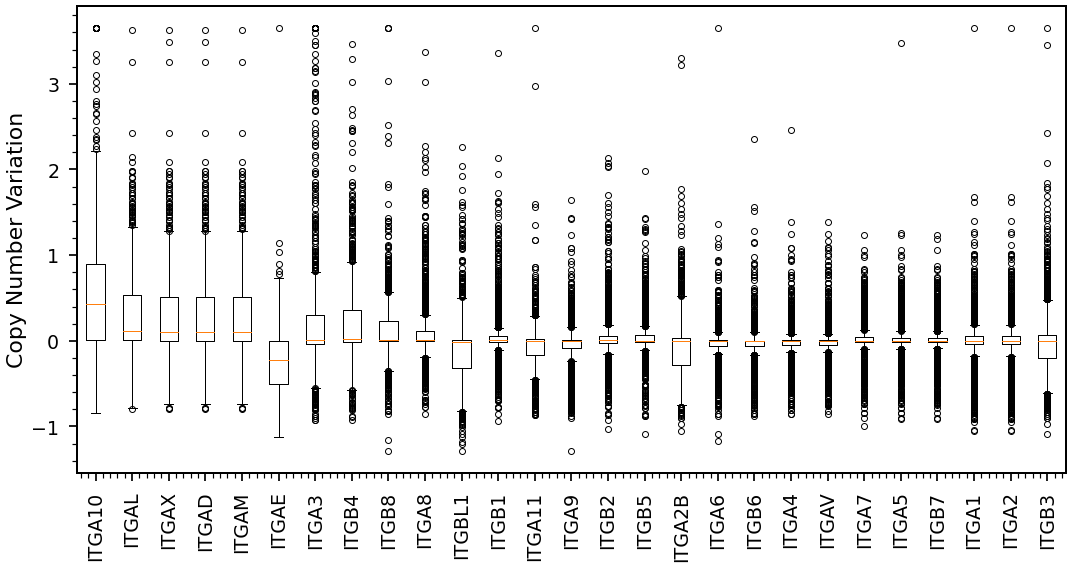

In [46]:
fig, ax = plt.subplots(figsize = (15,8))
df = CNV_ITG[(CNV_ITG.columns[CNV_ITG.columns.str.contains('TCGA')]) | (CNV_ITG.columns[CNV_ITG.columns.str.contains('Symbol')])].copy()
ax.boxplot(df.set_index('Gene Symbol').T)
ax.set_xticklabels(df.set_index('Gene Symbol').T.columns)
plt.setp(ax.get_xticklabels(),fontsize=19,rotation=90)
#    ax.xticks(fontsize=18)
plt.setp(ax.get_yticklabels(),fontsize=19)
#    ax.set_yticks(fontsize=16)
ax.set_ylabel('Copy Number Variation',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(2)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


fig.tight_layout()




/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


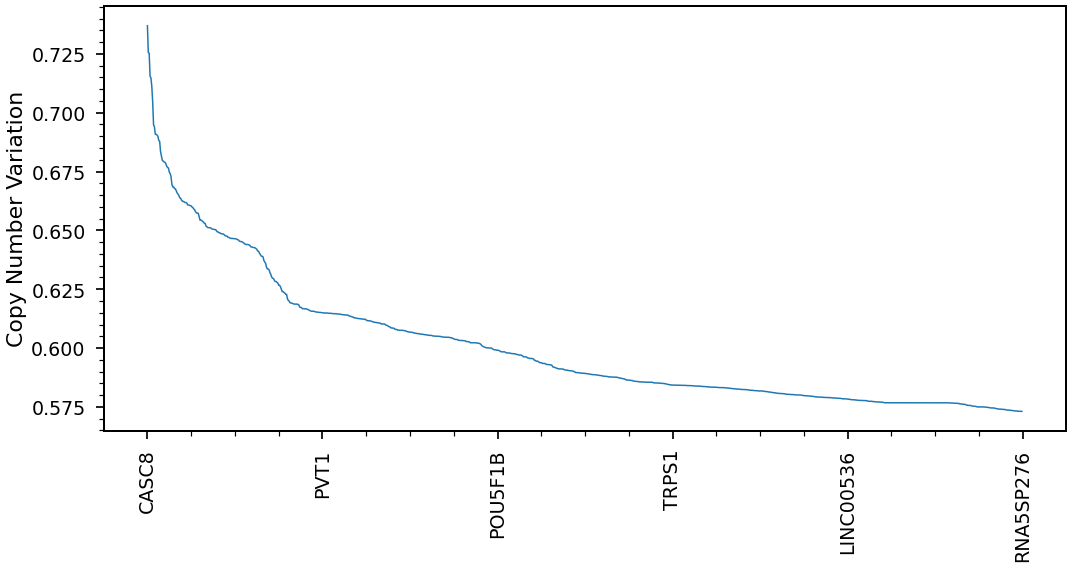

In [51]:


fig, ax = plt.subplots(figsize = (15,8))
n = 1000
ax.plot(CNV[:n]['gene_means'].values)
ax.set_xticklabels(CNV[:n]['Gene Symbol'].values)
plt.setp(ax.get_xticklabels(),fontsize=1,rotation=90)
#    ax.xticks(fontsize=18)
plt.setp(ax.get_yticklabels(),fontsize=19)
#    ax.set_yticks(fontsize=16)
ax.set_ylabel('Copy Number Variation',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(2)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


fig.tight_layout()




In [59]:
CNV.reset_index(drop=True)[CNV.reset_index(drop=True)['Gene Symbol']=='ITGA10']

,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene_means,gene_std
1516,ITGA10,0.216,-0.448,0.083,-0.023,0.0,0.555,-0.002,1.239,0.002,...,0.0,0.9,0.939,1.855,-0.071,0.012,0.486,0.669,0.546976,0.680845


In [79]:
pan_tcga_sample_info



,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
...,...,...,...,...,...,...,...
19126,TARGET-20-PANPKN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19127,TARGET-20-PANLIR-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19128,TARGET-20-PAPAWN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19129,TARGET-20-PANPTM-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET


# CNV TCGA PAN CANCER

In [92]:
chosen_tissues = ['Lung','Breast','Prostate','Stomach','Pancreas','Testis','Liver','Colon']
sample_info_chostiss=pan_tcga_sample_info[(pan_tcga_sample_info._primary_site.isin(chosen_tissues)) & (pan_tcga_sample_info._study=='TCGA')]
sample_info_chostiss.detailed_category.value_counts()


Breast Invasive Carcinoma         1212
Lung Adenocarcinoma                574
Prostate Adenocarcinoma            548
Lung Squamous Cell Carcinoma       548
Stomach Adenocarcinoma             450
Liver Hepatocellular Carcinoma     421
Colon Adenocarcinoma               331
Pancreatic Adenocarcinoma          183
Testicular Germ Cell Tumor         154
Name: detailed_category, dtype: int64

In [93]:
sample_info_chostiss

,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
1032,TCGA-XY-A8S2-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1033,TCGA-YU-A94I-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1034,TCGA-2G-AAG3-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1035,TCGA-XE-AANV-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1036,TCGA-2G-AAGM-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
...,...,...,...,...,...,...,...
9330,TCGA-BH-A18V-06,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Metastatic,Female,TCGA
9331,TCGA-E2-A15A-06,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Metastatic,Female,TCGA
9332,TCGA-E2-A15E-06,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Metastatic,Female,TCGA
9333,TCGA-BH-A1ES-06,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Metastatic,Female,TCGA


In [94]:
CNV_pancanc = pd.read_csv('TCGA.PANCAN.sampleMap_Gistic2_CopyNumber_Gistic2_all_data_by_genes.gz',sep='\t')
samples_w_info = CNV_pancanc.columns.intersection(sample_info_chostiss['sample'])



In [95]:
sample_info_chostiss = sample_info_chostiss[sample_info_chostiss['sample'].isin(samples_w_info )]
sample_info_chostiss

,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
1032,TCGA-XY-A8S2-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1033,TCGA-YU-A94I-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1034,TCGA-2G-AAG3-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1035,TCGA-XE-AANV-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
1036,TCGA-2G-AAGM-01,Testicular Germ Cell Tumor,Testicular Germ Cell Tumor,Testis,Primary Tumor,Male,TCGA
...,...,...,...,...,...,...,...
9323,TCGA-E9-A1NE-01,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Primary Tumor,Female,TCGA
9324,TCGA-AR-A0TQ-01,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Primary Tumor,Female,TCGA
9325,TCGA-AR-A24L-01,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Primary Tumor,Female,TCGA
9326,TCGA-B6-A0RG-01,Breast Invasive Carcinoma,Breast Invasive Carcinoma,Breast,Primary Tumor,Female,TCGA


In [96]:
#change cancer name to save df 
CNV_prostate = CNV_pancanc[['Sample']+sample_info_chostiss[sample_info_chostiss.detailed_category=='Prostate Adenocarcinoma']['sample'].values.tolist()].copy()
CNV_prostate = CNV_prostate[~CNV_prostate['Sample'].isin(unwanted_integrins)].copy()
CNV_prostate['gene_means'] = CNV_prostate.set_index('Sample').mean(axis=1).values
CNV_prostate['gene_std'] = CNV_prostate.set_index('Sample').std(axis=1).values
CNV_prostate = CNV_prostate.sort_values(by='gene_means',ascending=False,key=abs)

#change cancer name to save df 
CNV_breast = CNV_pancanc[['Sample']+sample_info_chostiss[sample_info_chostiss.detailed_category=='Breast Invasive Carcinoma']['sample'].values.tolist()].copy()
CNV_breast = CNV_breast[~CNV_breast['Sample'].isin(unwanted_integrins)].copy()
CNV_breast['gene_means'] = CNV_breast.set_index('Sample').mean(axis=1).values
CNV_breast['gene_std'] = CNV_breast.set_index('Sample').std(axis=1).values
CNV_breast = CNV_breast.sort_values(by='gene_means',ascending=False,key=abs)

#change cancer name to save df 
CNV_stomach = CNV_pancanc[['Sample']+sample_info_chostiss[sample_info_chostiss.detailed_category=='Stomach Adenocarcinoma']['sample'].values.tolist()].copy()
CNV_stomach = CNV_stomach[~CNV_stomach['Sample'].isin(unwanted_integrins)].copy()
CNV_stomach['gene_means'] = CNV_stomach.set_index('Sample').mean(axis=1).values
CNV_stomach['gene_std'] = CNV_stomach.set_index('Sample').std(axis=1).values
CNV_stomach = CNV_stomach.sort_values(by='gene_means',ascending=False,key=abs)

#change cancer name to save df 
CNV_testis = CNV_pancanc[['Sample']+sample_info_chostiss[sample_info_chostiss.detailed_category=='Testicular Germ Cell Tumor']['sample'].values.tolist()].copy()
CNV_testis = CNV_testis[~CNV_testis['Sample'].isin(unwanted_integrins)].copy()
CNV_testis['gene_means'] = CNV_testis.set_index('Sample').mean(axis=1).values
CNV_testis['gene_std'] = CNV_testis.set_index('Sample').std(axis=1).values
CNV_testis = CNV_testis.sort_values(by='gene_means',ascending=False,key=abs)


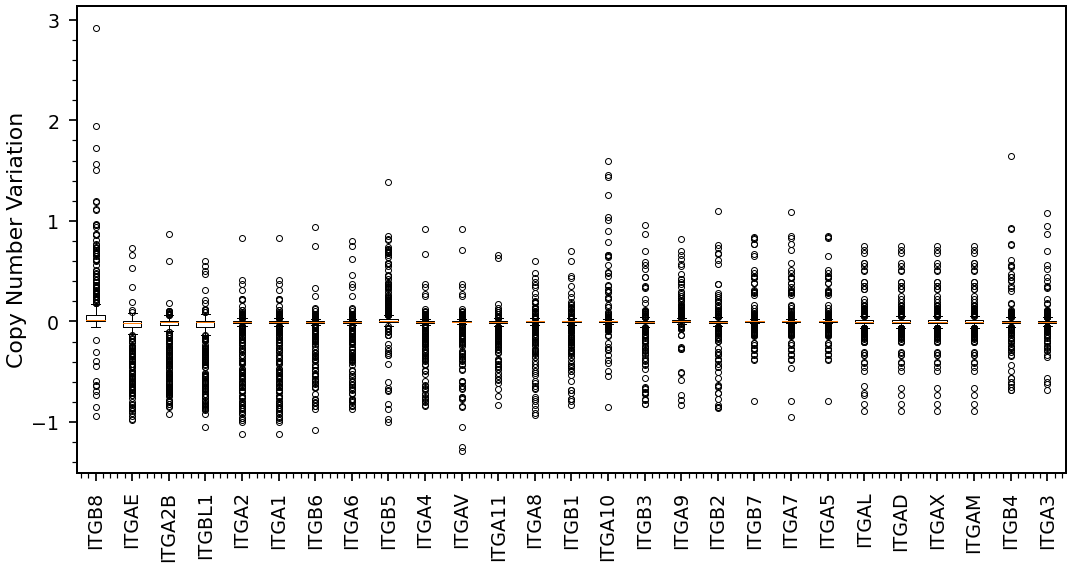

In [97]:
fig, ax = plt.subplots(figsize = (15,8))
df = CNV_prostate[(CNV_prostate.columns[CNV_prostate.columns.str.contains('TCGA')]) | (CNV_prostate.columns[CNV_prostate.columns.str.contains('Sample')])].copy()
df = df[df['Sample'].str.contains('ITG')]
ax.boxplot(df.set_index('Sample').T)
ax.set_xticklabels(df.set_index('Sample').T.columns)
plt.setp(ax.get_xticklabels(),fontsize=19,rotation=90)
#    ax.xticks(fontsize=18)
plt.setp(ax.get_yticklabels(),fontsize=19)
#    ax.set_yticks(fontsize=16)
ax.set_ylabel('Copy Number Variation',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(2)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


fig.tight_layout()




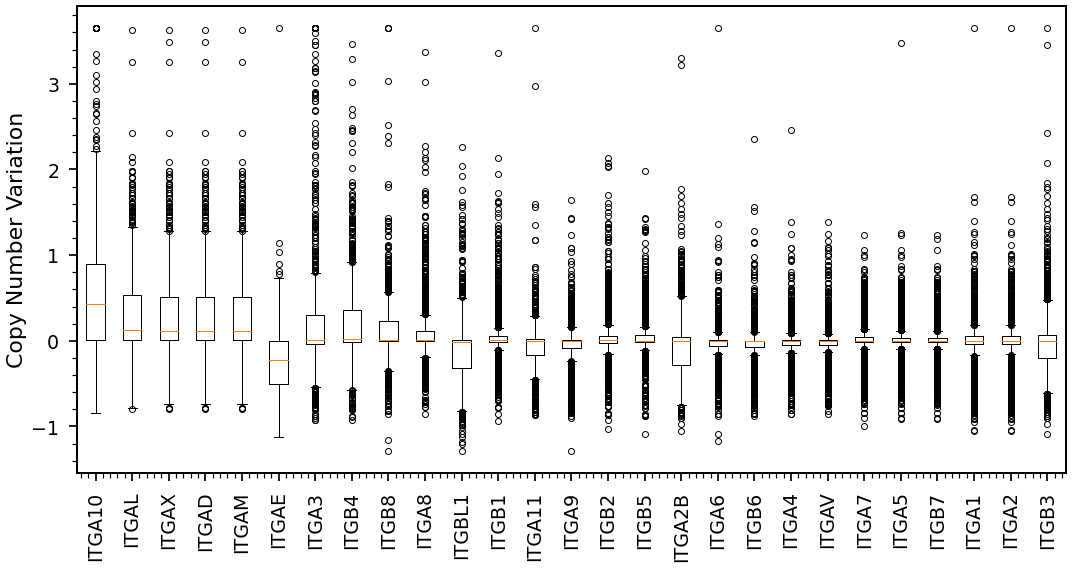

In [98]:
fig, ax = plt.subplots(figsize = (15,8))
df = CNV_breast[(CNV_breast.columns[CNV_breast.columns.str.contains('TCGA')]) | (CNV_breast.columns[CNV_breast.columns.str.contains('Sample')])].copy()
df = df[df['Sample'].str.contains('ITG')]
ax.boxplot(df.set_index('Sample').T)
ax.set_xticklabels(df.set_index('Sample').T.columns)
plt.setp(ax.get_xticklabels(),fontsize=19,rotation=90)
#    ax.xticks(fontsize=18)
plt.setp(ax.get_yticklabels(),fontsize=19)
#    ax.set_yticks(fontsize=16)
ax.set_ylabel('Copy Number Variation',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(2)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


fig.tight_layout()




In [99]:
samples_w_info

Index(['TCGA-AR-A1AH-01', 'TCGA-44-6778-01', 'TCGA-C8-A1HL-01',
       'TCGA-05-4420-01', 'TCGA-CC-A3MA-01', 'TCGA-KK-A6E4-01',
       'TCGA-IN-7808-01', 'TCGA-HC-7736-01', 'TCGA-BR-A4QL-01',
       'TCGA-CH-5751-01',
       ...
       'TCGA-AO-A0J4-01', 'TCGA-77-6844-01', 'TCGA-A2-A0YK-01',
       'TCGA-18-3414-01', 'TCGA-A8-A09K-01', 'TCGA-IB-7885-01',
       'TCGA-95-7947-01', 'TCGA-VQ-AA6F-01', 'TCGA-BR-8588-01',
       'TCGA-DD-A115-01'],
      dtype='object', length=3953)

In [100]:
CNV_pancanc_ITG = CNV_pancanc[CNV_pancanc['Sample'].str.contains('ITG')]
CNV_pancanc_ITG = CNV_pancanc_ITG[~CNV_pancanc_ITG['Sample'].isin(unwanted_integrins)].copy()
CNV_pancanc_ITG = CNV_pancanc_ITG.set_index('Sample')[ (CNV_pancanc_ITG.columns[CNV_pancanc_ITG.columns.isin(samples_w_info)]) ] .copy()


In [101]:
CNV_pancanc_ITG.T




Sample,ITGA10,ITGB6,ITGA6,ITGA4,ITGAV,ITGA9,ITGB5,ITGA1,ITGA2,ITGB8,...,ITGAL,ITGAM,ITGAX,ITGAD,ITGAE,ITGA2B,ITGB3,ITGA3,ITGB4,ITGB2
TCGA-AR-A1AH-01,3.263,0.000,0.000,0.002,0.002,-0.745,-0.751,-0.765,-0.765,0.066,...,-0.186,-0.186,-0.186,-0.186,-0.761,-0.746,-0.746,-0.746,0.071,0.051
TCGA-44-6778-01,0.593,0.674,0.210,0.210,0.210,-0.279,-0.042,-0.290,-0.290,0.000,...,0.156,0.156,0.156,0.156,-0.317,-0.061,0.578,0.511,-0.049,-0.297
TCGA-C8-A1HL-01,0.024,-0.010,-0.010,-0.010,-0.010,0.000,-0.003,0.004,0.004,0.003,...,0.019,0.019,0.019,0.019,-0.713,-0.699,-0.699,-0.699,0.063,0.006
TCGA-05-4420-01,-0.116,0.319,-0.077,-0.050,-0.050,-0.128,0.194,-0.098,-0.098,0.991,...,0.980,0.980,0.980,0.980,-0.460,-0.077,-0.076,-0.076,0.329,-0.521
TCGA-CC-A3MA-01,1.346,-0.001,-0.001,-0.001,-0.001,-0.766,0.029,0.013,0.013,0.020,...,-0.093,-0.093,-0.093,-0.093,-0.739,-0.007,-0.007,-0.007,-0.007,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-IB-7885-01,0.012,0.010,0.010,0.010,0.010,-0.054,-0.054,0.012,0.012,0.020,...,0.007,0.007,0.007,0.007,-0.039,-0.039,-0.039,-0.039,-0.039,-0.149
TCGA-95-7947-01,-0.465,0.005,0.005,0.034,0.034,-0.621,0.613,-0.609,-0.609,2.433,...,0.454,0.454,0.454,0.454,-0.665,-0.042,-0.042,-0.042,-0.042,-0.009
TCGA-VQ-AA6F-01,0.017,0.039,0.039,0.039,-0.557,-0.186,0.445,0.148,0.148,0.159,...,0.338,0.338,0.338,0.338,-0.215,0.204,0.204,0.204,0.204,-0.180
TCGA-BR-8588-01,0.151,-0.001,-0.001,-0.001,-0.001,-0.002,0.105,-0.007,-0.007,-0.008,...,0.000,0.000,0.000,0.000,0.004,0.004,0.004,0.004,0.004,0.000


In [102]:
sample_info_chostiss.set_index('sample').loc[sample_cols].detailed_category.values

array(['Lung Adenocarcinoma', 'Lung Adenocarcinoma',
       'Liver Hepatocellular Carcinoma', ..., 'Stomach Adenocarcinoma',
       'Stomach Adenocarcinoma', 'Liver Hepatocellular Carcinoma'],
      dtype=object)

In [103]:
sample_info_chostiss[sample_info_chostiss['sample'].isin(sample_cols)].detailed_category

1032    Testicular Germ Cell Tumor
1033    Testicular Germ Cell Tumor
1034    Testicular Germ Cell Tumor
1035    Testicular Germ Cell Tumor
1036    Testicular Germ Cell Tumor
                   ...            
7763          Colon Adenocarcinoma
7764          Colon Adenocarcinoma
7765          Colon Adenocarcinoma
7766          Colon Adenocarcinoma
7767          Colon Adenocarcinoma
Name: detailed_category, Length: 2879, dtype: object

/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hshadman/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3953 samples in 0.000s...
[t-SNE] Computed neighbors for 3953 samples in 0.433s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3953
[t-SNE] Computed conditional probabilities for sample 2000 / 3953
[t-SNE] Computed conditional probabilities for sample 3000 / 3953
[t-SNE] Computed conditional probabilities for sample 3953 / 3953
[t-SNE] Mean sigma: 0.056649
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.871880
[t-SNE] KL divergence after 1000 iterations: 1.974627


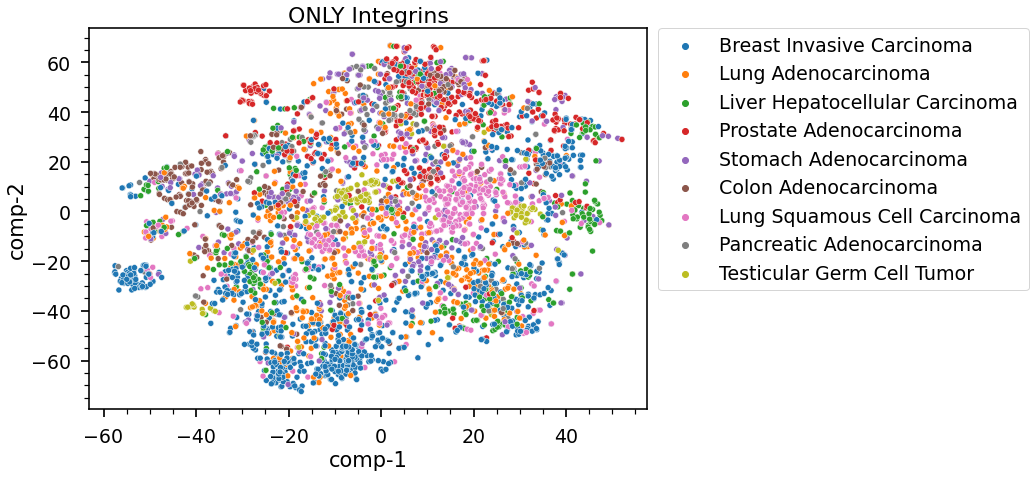

In [104]:
fig, ax = plt.subplots (figsize = (10,7))



#drop nan values
#data = data.dropna(axis=0,how='any')

#x is integrin expression, sample_cols is sample id sets, y is what disease that sample is
x = CNV_pancanc_ITG.T

sample_cols = CNV_pancanc_ITG.columns
y = sample_info_chostiss.set_index('sample').loc[sample_cols].detailed_category.values


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("tab10", len(df.y.unique())),ax=ax,
                 data=df).axes.set_title("ONLY Integrins",fontsize=22)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=19)
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('comp-1',fontsize=21)
ax.set_ylabel('comp-2',fontsize=21)
#ax.set_ylim(0.8,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


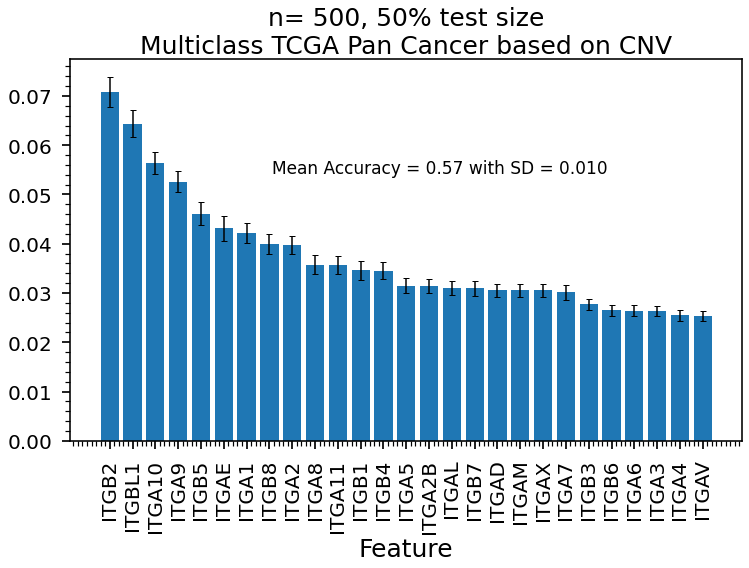

In [121]:
label_canc='Multiclass TCGA Pan Cancer based on CNV'
#class weight balanced here
#DO NOT MAKE mistake on title cancer label. be careful 
fig, ax = plt.subplots(1,2, figsize=(20, 8))
n=500
feature_importance=[]
accuracy=[]
test_size=0.50
auc_roc=[]
f1score=[]
y_test_total=[]
y_pred_total=[]
feature_importances={"feature": [],"importance": []}
for iteration in range(n):
    X = CNV_pancanc_ITG.T
    sample_cols = CNV_pancanc_ITG.columns
    y = sample_info_chostiss.set_index('sample').loc[sample_cols].detailed_category.values
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    ### Random Forest Classifier ###
    classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                        class_weight= 'balanced')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_test_total=y_test_total+list(y_test)
    y_pred_total=y_pred_total+list(y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    #f1score.append(f1_score(y_test,y_pred))
    #auc_roc.append(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]))
    for i,j in zip(X.columns,classifier.feature_importances_):
        feature_importances['feature'].append(i) 
        feature_importances['importance'].append(j)
#now plotting
pd.DataFrame(accuracy,columns=['accuracy']).plot(kind='hist',edgecolor='black',ax=ax[0],legend=False)
ax[0].set_title(f"n= {n}",fontsize=25)
#ax[0].legend(fontsize=13)
plt.setp(ax[0].get_xticklabels(),fontsize=12)
plt.setp(ax[0].get_yticklabels(),fontsize=12)
ax[0].set_ylabel('Frequency',fontsize=25)
feature_importance_df=pd.DataFrame(feature_importances).set_index('feature')
feature_importance_df = feature_importance_df.sort_values(by='importance')
for i in ['top', 'left', 'right', 'bottom']:
    ax[0].spines[i].set_linewidth(1.6)

ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)   
ax[0].set_xlabel('Accuracy',fontsize=25)


feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)

feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]


bars=ax[1].bar(feature_importance_df_mean.index,
    feature_importance_df_mean['importance'],
                                yerr=feature_importance_df_err['importance'].values,
                                capsize=3)

ax[1].set_title(f"n= {n}, {int(test_size*100)}% test size\n{label_canc}",fontsize=25)
plt.setp(ax[1].get_xticklabels(),fontsize=12,rotation=90)
plt.setp(ax[1].get_yticklabels(),fontsize=12)
ax[1].set_xlabel('Feature',fontsize=25)
#ax[1].legend(feature_importance_df_mean.relative_expression.unique(),fontsize=17)
# handles = [mpatches.Patch(color=colors[i]) for i in colors]
# labels = [f'{i} expression' for i in colors]
# plt.legend(handles, labels,fontsize=17)

for i in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)

ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='both', which='minor', width = 1.2, size = 5)    
ax[1].text(0.3,
           0.7,
f'Mean Accuracy = {format(np.mean(np.array(accuracy)),"0.2f")} with SD = {format(np.std(np.array(accuracy)),"0.3f")}',
           transform=ax[1].transAxes,fontsize=17)

ax[0].remove()
plt.tight_layout()

#plt.savefig(f'figures/gtex_tcga_pan_{label_canc}_class-weight_bal.jpg', dpi = 1000, bbox_inches='tight')


